# nn.BCELoss()

## Preparation

In [4]:
from fastai.vision.all import *

In [6]:
batch_size = 5
n_classes = 3

In [75]:
t = [
    [0, 1, 1],
    [1, 1, 1],
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
]
#torch.stack([Tensor(y) for y in x] for x in t)
t = torch.tensor(t, dtype=torch.long)
t

tensor([[0, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0]])

In [102]:
W = torch.randn(9, n_classes)
b = torch.randn(1)
X = torch.randn(batch_size, 9)
y = F.relu(X@W + b)
y.shape, y

(torch.Size([5, 3]),
 tensor([[4.0340, 0.0000, 3.0853],
         [3.1036, 0.0000, 0.0000],
         [0.0000, 1.1581, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [1.3523, 0.0000, 1.1482]]))

## nn.CrossEntropyLoss()

In [103]:
y.shape, t.shape

(torch.Size([5, 3]), torch.Size([5, 3]))

In [104]:
loss = nn.BCEWithLogitsLoss()(y, t.float())
loss

tensor(0.9877)

In [105]:
y0 = y.sigmoid()
y0

tensor([[0.9826, 0.5000, 0.9563],
        [0.9570, 0.5000, 0.5000],
        [0.5000, 0.7610, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.7945, 0.5000, 0.7592]])

In [106]:
t

tensor([[0, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0]])

In [108]:
-torch.where(t==1, y0, 1-y0).log().mean()

tensor(0.9877)

# Accuracy for BCE

In [115]:
def accum(y, tgt, thr):
    return ((y.sigmoid()>thr)==tgt).float().mean()

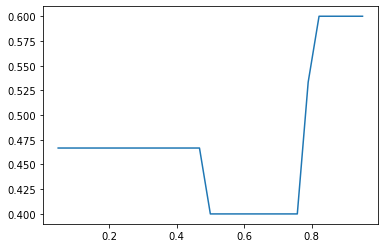

In [117]:
xs = torch.linspace(0.05,0.95,29)
accs = [accum(y, t, thr=i) for i in xs]
plt.plot(xs,accs)